In [73]:
import pyodbc
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
path = "C:\\Users\\pphirke\\Downloads\\archive"  # Insert path here
database = path + '\\database.sqlite'


#### Connecting to database

In [184]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


#### Database Schema For European Football

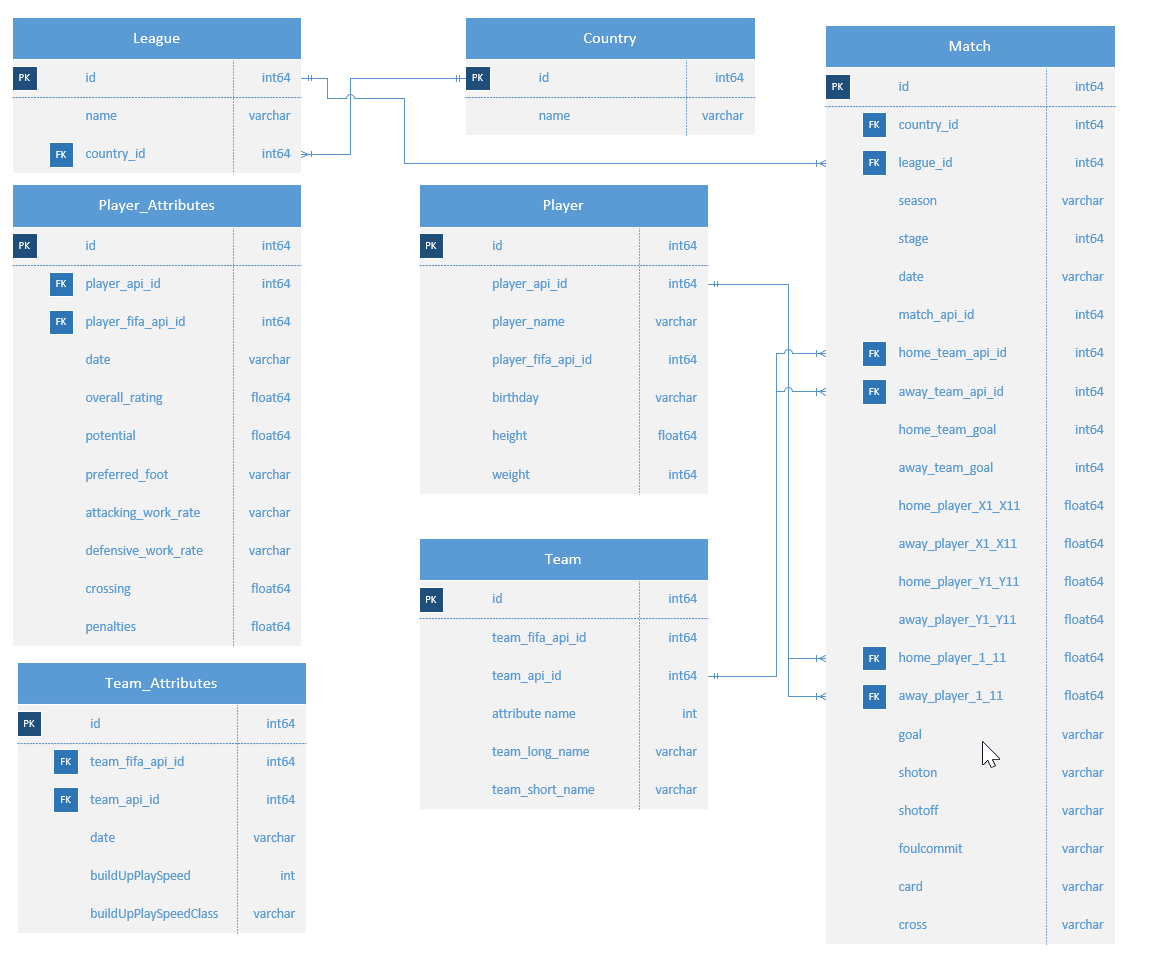

#### List of Countries

In [125]:
countries = pd.read_sql('''Select * from Country;''',conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### Countries with their League name

In [126]:
leagues = pd.read_sql("""SELECT l.name as League, c.name as Country
                        FROM League l
                        JOIN Country c ON c.id = l.country_id;""", conn)
leagues

,League,Country
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


#### Team name and team code

In [185]:
team = pd.read_sql('''Select team_long_name as Team_Name, team_short_name as Team_code 
                    from Team
                    order by team_long_name
                    limit 15;''',conn)
team

,Team_Name,Team_code
0,1. FC Kaiserslautern,KAI
1,1. FC Köln,FCK
2,1. FC Nürnberg,NUR
3,1. FSV Mainz 05,MAI
4,AC Ajaccio,AJA
5,AC Arles-Avignon,ARL
6,AC Bellinzona,BEL
7,ADO Den Haag,HAA
8,AJ Auxerre,AUX
9,AS Monaco,MON


#### Top 5 matches with highest home team goals

In [155]:
homematch = pd.read_sql('''Select 
                       m.id as [Match id],
                       c.name as [Country],
                       l.name as [League],
                       m.season as [Season],
                       ht.team_long_name as [Home Team],
                       at.team_long_name as [Away Team],
                       m.home_team_goal as [Home Team Goal]
                       from Match m
                       inner join Country c on c.id=m.country_id
                       inner join League l on l.id=m.league_id
                       inner join Team as ht on ht.team_api_id=m.home_team_api_id
                       inner join Team as at on at.team_api_id=m.away_team_api_id
                       order by  m.home_team_goal desc
                       LIMIT 5
                       ;''',conn)
homematch

,Match id,Country,League,Season,Home Team,Away Team,Home Team Goal
0,13899,Netherlands,Netherlands Eredivisie,2010/2011,PSV,Feyenoord,10
1,24248,Spain,Spain LIGA BBVA,2015/2016,Real Madrid CF,Rayo Vallecano,10
2,2157,England,England Premier League,2009/2010,Tottenham Hotspur,Wigan Athletic,9
3,9211,Germany,Germany 1. Bundesliga,2012/2013,FC Bayern Munich,Hamburger SV,9
4,20162,Scotland,Scotland Premier League,2010/2011,Celtic,Aberdeen,9


#### Top 5 matches with highest away team goals

In [156]:
awaymatch = pd.read_sql('''Select 
                       m.id as [Match id],
                       c.name as [Country],
                       l.name as [League],
                       m.season as [Season],
                       at.team_long_name as [Away Team],
                       m.home_team_goal as [Home Team Goal],
                       m.away_team_goal as [Away Team Goal]
                       from Match m
                       inner join Country c on c.id=m.country_id
                       inner join League l on l.id=m.league_id
                       inner join Team as ht on ht.team_api_id=m.home_team_api_id
                       inner join Team as at on at.team_api_id=m.away_team_api_id
                       order by  m.away_team_goal desc
                       LIMIT 5
                       ;''',conn)
awaymatch

,Match id,Country,League,Season,Away Team,Home Team Goal,Away Team Goal
0,7661,France,France Ligue 1,2015/2016,Paris Saint-Germain,0,9
1,8663,Germany,Germany 1. Bundesliga,2010/2011,FC Bayern Munich,1,8
2,22311,Spain,Spain LIGA BBVA,2010/2011,FC Barcelona,0,8
3,24082,Spain,Spain LIGA BBVA,2014/2015,FC Barcelona,0,8
4,24123,Spain,Spain LIGA BBVA,2014/2015,Real Madrid CF,2,8


#### Visualizations for Home Team and Away Team Goals

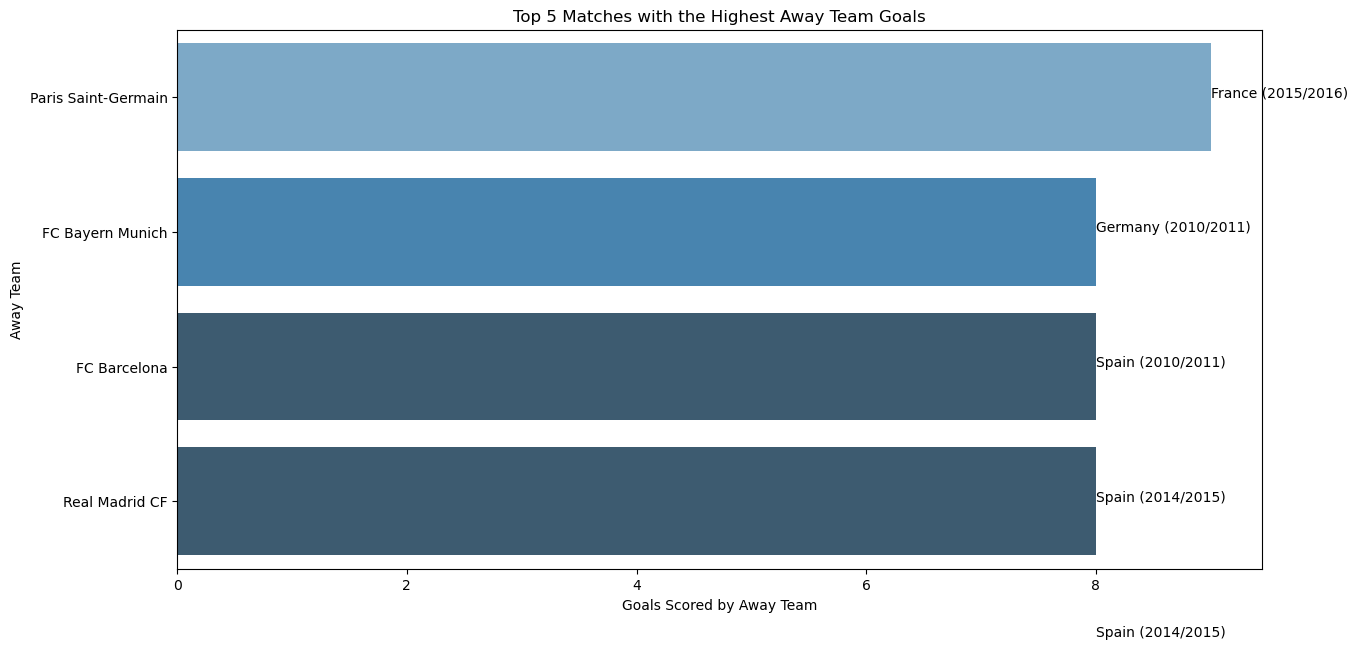

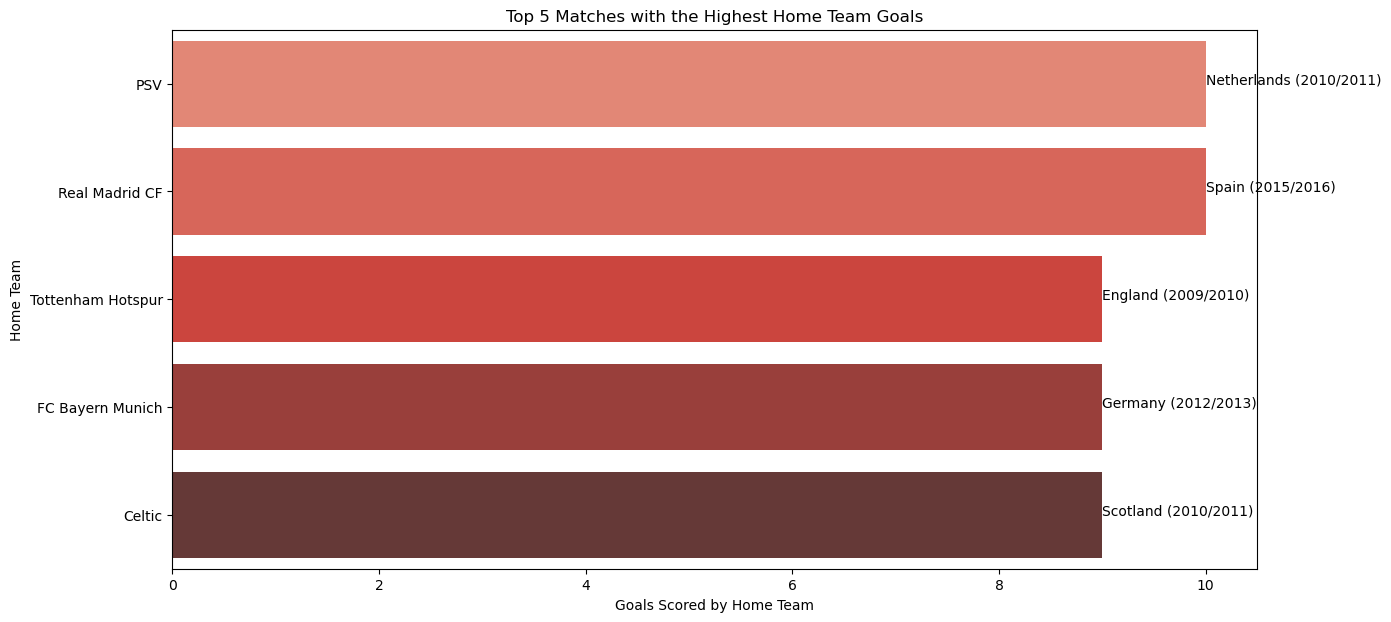

In [157]:

plt.figure(figsize=(14, 7))
sns.barplot(x="Away Team Goal", y="Away Team", hue="Country", data=awaymatch, palette="Blues_d", dodge=False)
for index, row in awaymatch.iterrows():
    plt.text(row['Away Team Goal'], index, f"{row['Country']} ({row['Season']})", color='black', ha="left")
plt.title('Top 5 Matches with the Highest Away Team Goals')
plt.xlabel('Goals Scored by Away Team')
plt.ylabel('Away Team')
plt.legend().remove()
plt.show()

# Plotting top 5 matches with the highest home team goals with additional details
plt.figure(figsize=(14, 7))
sns.barplot(x="Home Team Goal", y="Home Team", hue="Country", data=homematch, palette="Reds_d", dodge=False)
for index, row in homematch.iterrows():
    plt.text(row['Home Team Goal'], index, f"{row['Country']} ({row['Season']})", color='black', ha="left")
plt.title('Top 5 Matches with the Highest Home Team Goals')
plt.xlabel('Goals Scored by Home Team')
plt.ylabel('Home Team')
plt.legend().remove()
plt.show()


#### Average Goals scored by Home and Away Team per Country

In [158]:
avggoals = pd.read_sql('''SELECT 
    C.name AS country, 
    AVG(M.home_team_goal) AS avg_home_goals, 
    AVG(M.away_team_goal) AS avg_away_goals
FROM 
    Match M
JOIN 
    Country C ON M.country_id = C.id
GROUP BY 
    C.name;''',conn)

avggoals

,country,avg_home_goals,avg_away_goals
0,Belgium,1.609375,1.192130
1,England,1.550987,1.159539
2,France,1.402961,1.040132
3,Germany,1.626634,1.274918
4,Italy,1.500829,1.116009
5,Netherlands,1.779820,1.301062
6,Poland,1.394792,1.030208
7,Portugal,1.408382,1.126218
8,Scotland,1.429276,1.204496
9,Spain,1.631250,1.135855


####  Player Attributes Over Time

In [132]:
player_attributes = pd.read_sql('''SELECT 
    P.player_name, 
    PA.date, 
    PA.overall_rating, 
    PA.potential, 
    PA.attacking_work_rate, 
    PA.defensive_work_rate
FROM 
    Player P
JOIN 
    Player_Attributes PA ON P.player_api_id = PA.player_api_id
ORDER BY 
    PA.date DESC
LIMIT 10;''',conn)

player_attributes 



,player_name,date,overall_rating,potential,attacking_work_rate,defensive_work_rate
0,Adalberto Penaranda,2016-07-07 00:00:00,72,84,medium,medium
1,Baptiste Aloe,2016-07-07 00:00:00,66,76,medium,medium
2,Bebe,2016-07-07 00:00:00,72,75,medium,low
3,Florian Lejeune,2016-07-07 00:00:00,73,77,medium,high
4,Jhon Murillo,2016-07-07 00:00:00,67,79,medium,medium
5,Kevin Koubemba,2016-07-07 00:00:00,64,68,medium,low
6,Ronnie Schwartz,2016-07-07 00:00:00,68,70,medium,low
7,Wallace,2016-07-07 00:00:00,74,82,medium,medium
8,Yanis Mbombo Lokwa,2016-07-07 00:00:00,63,72,medium,medium
9,Anderson Conceicao,2016-06-30 00:00:00,68,70,medium,medium


In [182]:
player_details = pd.read_sql('''SELECT 
                                   * FROM  
                                   Player_Attributes ;''',conn)

player_details.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Histograms to display the distributions of 'attacking_work_rate', 'defensive_work_rate', 'overall_rating', and 'potential' within the Player_Attributes dataset.

<Axes: xlabel='potential', ylabel='Count'>

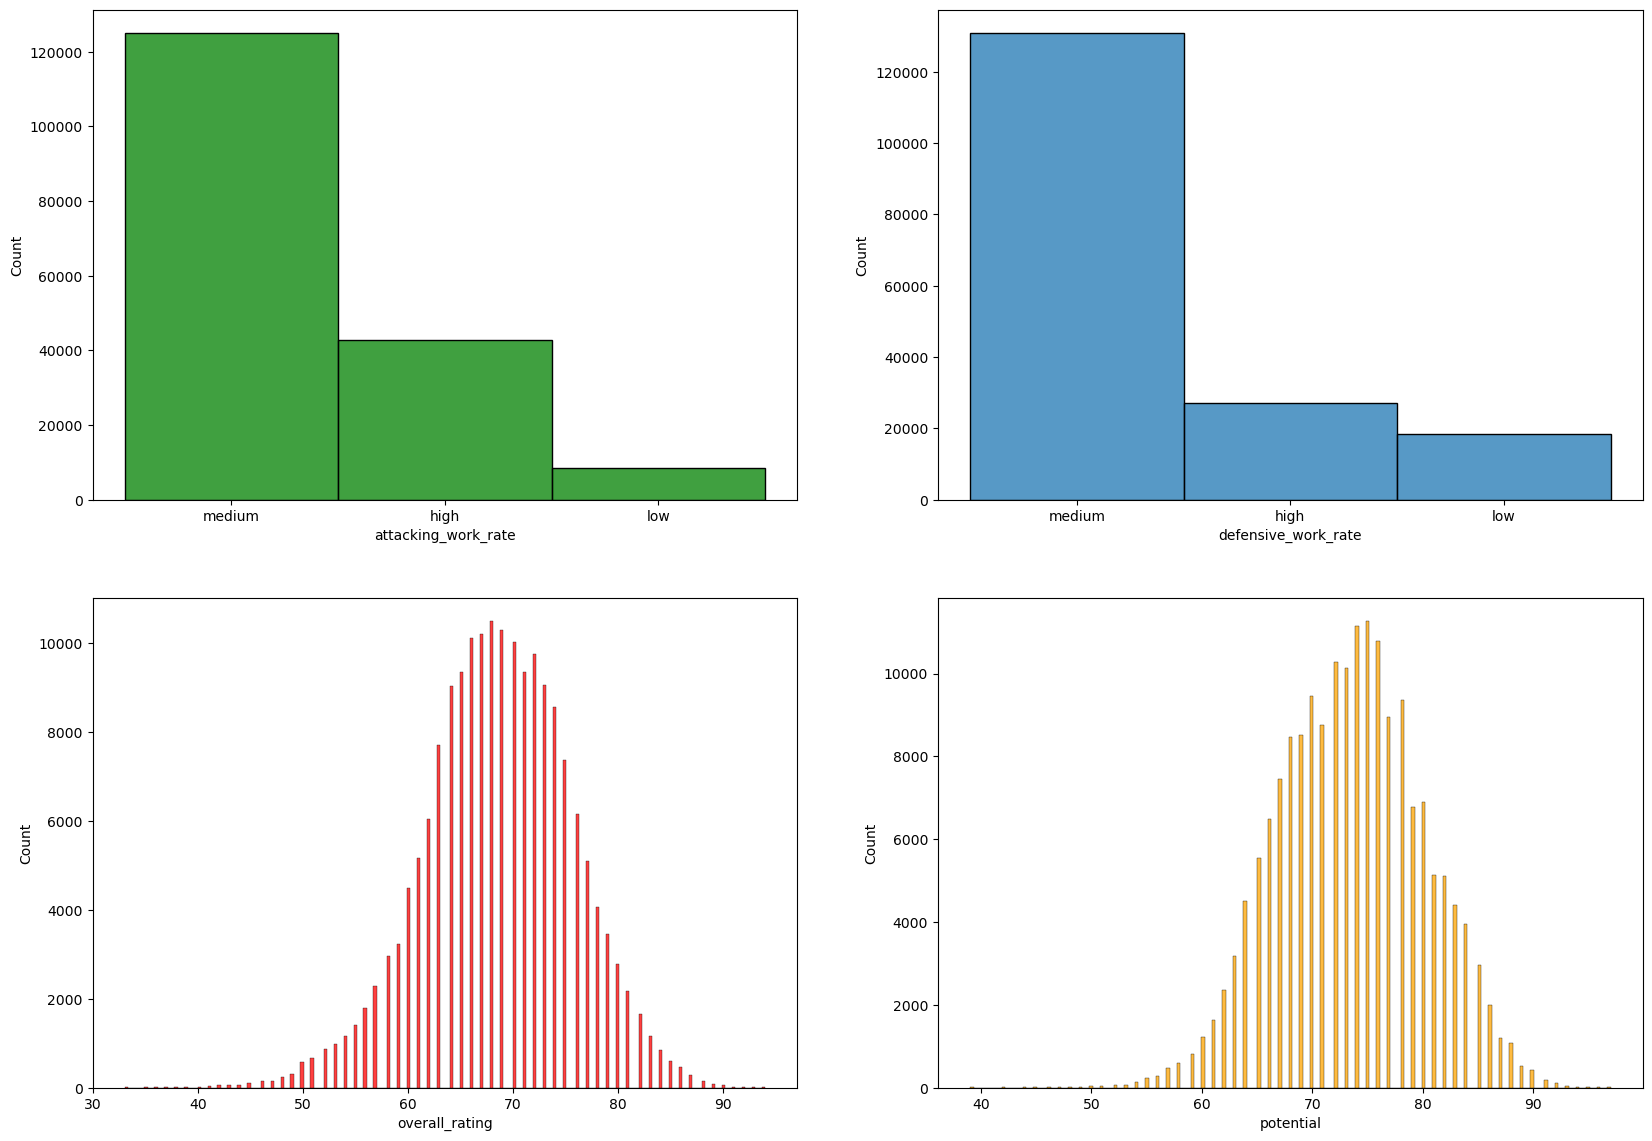

In [183]:
fig ,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,14))

attack_work_rate = player_details[player_details['attacking_work_rate'].isin(['medium','high','low'])]
defence_work_rate = player_details[player_details['defensive_work_rate'].isin(['medium','high','low'])]


sns.histplot(attack_work_rate['attacking_work_rate'],ax=axes[0,0],color='green')
sns.histplot(defence_work_rate['defensive_work_rate'],ax=axes[0,1])
sns.histplot(player_details['overall_rating'],ax=axes[1,0],color='red')
sns.histplot(player_details['potential'],ax=axes[1,1],color='orange')

In [166]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<Axes: title={'center': 'Potential vs Height'}, xlabel='calc_height'>

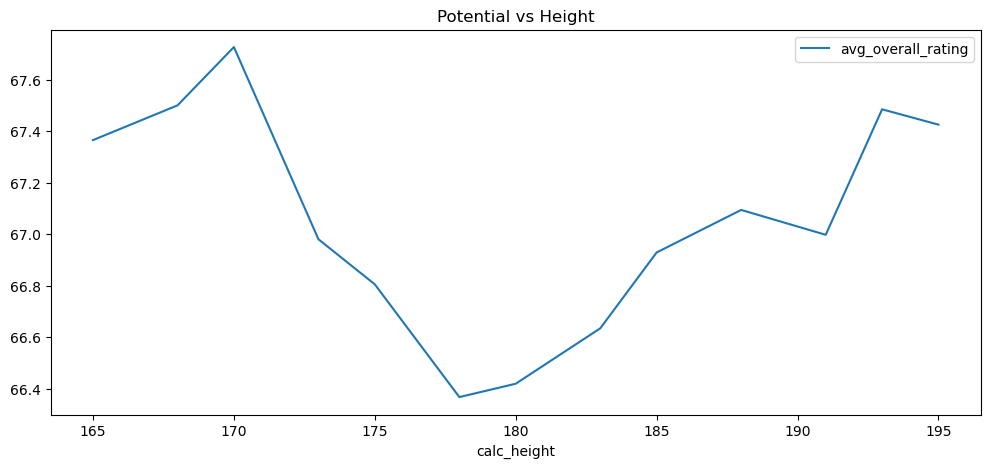

In [169]:
players_height.plot(x='calc_height',y='avg_overall_rating',figsize=(12,5),title='Potential vs Height')

#### Comparison of Overall Rating and Potential for Top 10 Players

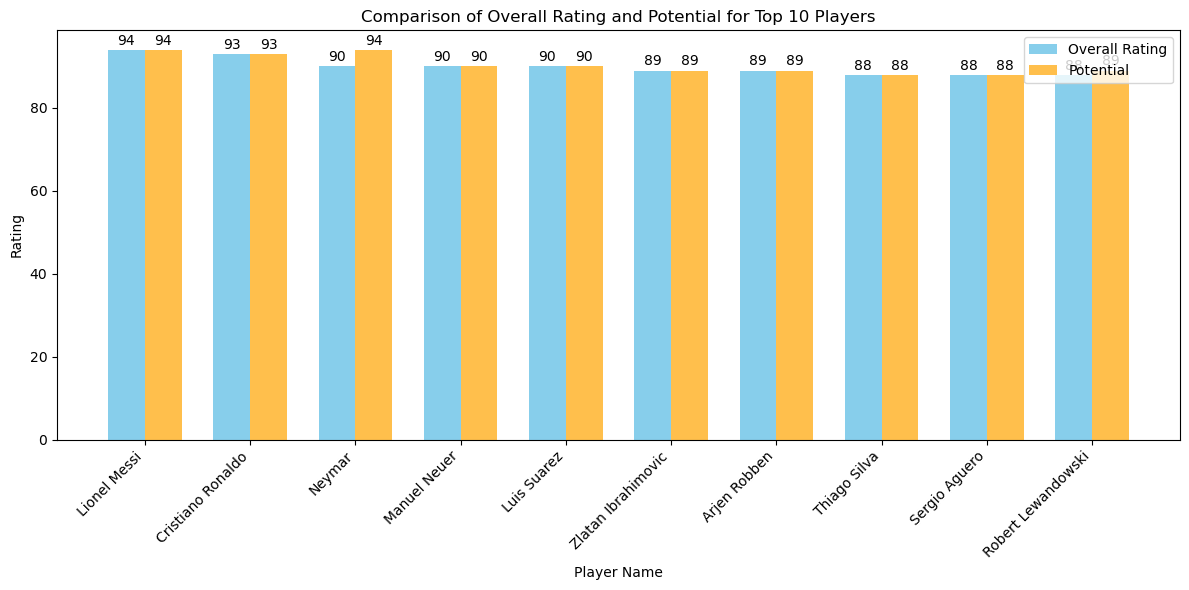

In [159]:

player_attributes = pd.read_sql('''
    SELECT 
        P.player_name, 
        MAX(PA.date) AS date, 
        PA.overall_rating, 
        PA.potential, 
        PA.attacking_work_rate, 
        PA.defensive_work_rate
    FROM 
        Player P
    JOIN 
        Player_Attributes PA ON P.player_api_id = PA.player_api_id
    GROUP BY 
        P.player_name
    ORDER BY 
        PA.overall_rating DESC
    LIMIT 10;
''', conn)


player_attributes_sorted = player_attributes.sort_values('overall_rating', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(player_attributes_sorted))

plt.bar(index, player_attributes_sorted['overall_rating'], bar_width, label='Overall Rating', color='skyblue')
plt.bar(index + bar_width, player_attributes_sorted['potential'], bar_width, label='Potential', color='orange', alpha=0.7)

plt.xlabel('Player Name')
plt.ylabel('Rating')
plt.title('Comparison of Overall Rating and Potential for Top 10 Players')
plt.xticks(index + bar_width / 2, player_attributes_sorted['player_name'], rotation=45, ha='right')
plt.legend()
for i, (overall, potential) in enumerate(zip(player_attributes_sorted['overall_rating'], player_attributes_sorted['potential'])):
    plt.text(i, overall + 0.5, str(overall), ha='center', va='bottom', color='black')
    plt.text(i + bar_width, potential + 0.5, str(potential), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

#### Top 5 Longest Playing Teams Performance Over Seasons (Average Away Goals & Average Home Goals)

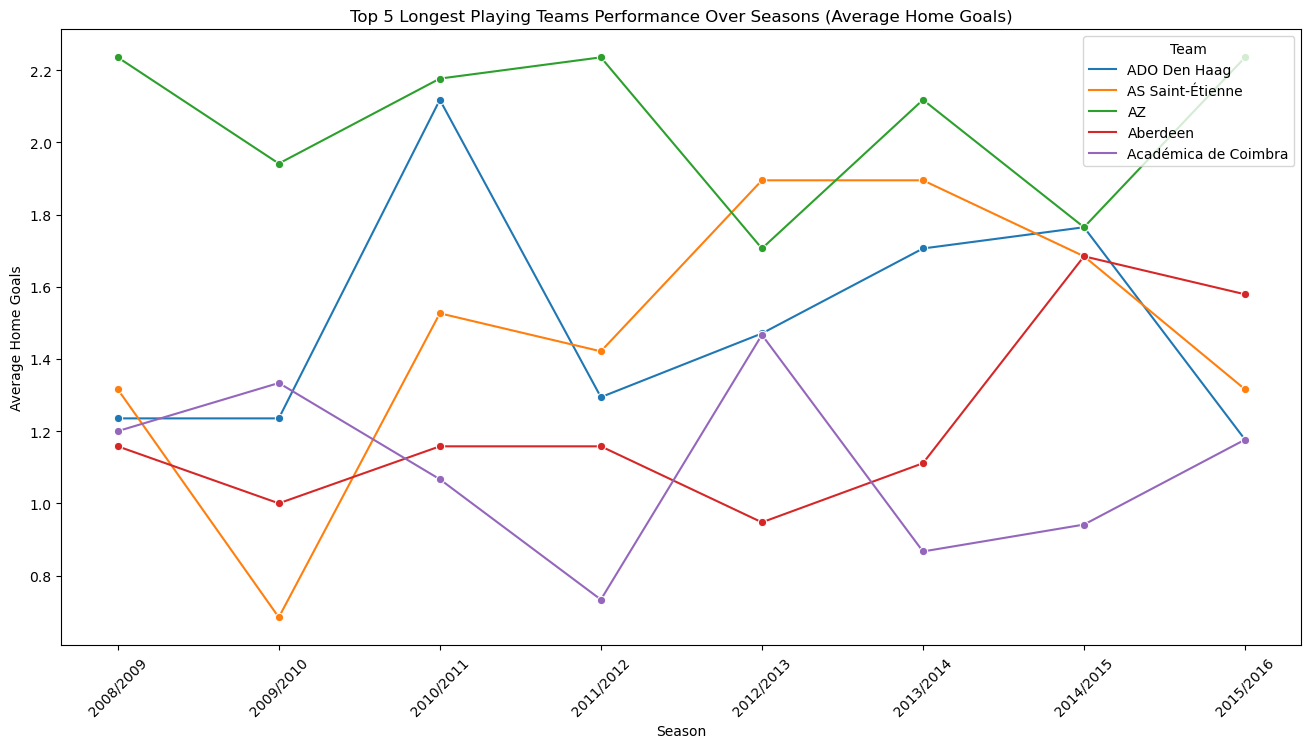

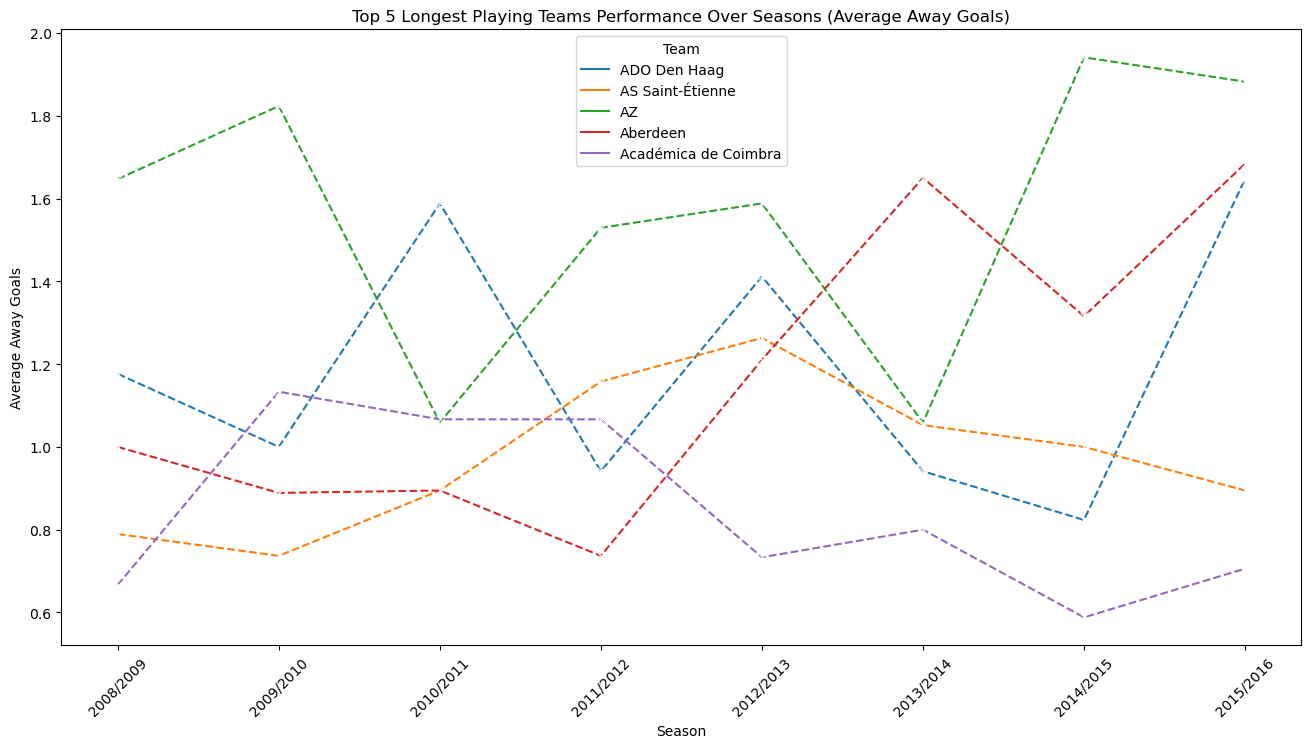

In [140]:
top_5_teams_query = """
WITH TeamSeasons AS (
    SELECT 
        T.team_long_name, 
        COUNT(DISTINCT M.season) AS seasons_played
    FROM 
        Match M
    JOIN 
        Team T ON M.home_team_api_id = T.team_api_id OR M.away_team_api_id = T.team_api_id
    GROUP BY 
        T.team_long_name
)
SELECT 
    team_long_name
FROM 
    TeamSeasons
ORDER BY 
    seasons_played DESC
LIMIT 5;
"""

top_5_teams = pd.read_sql_query(top_5_teams_query, conn)
top_5_team_names = top_5_teams['team_long_name'].tolist()

# Create a query to get team performance for the top 5 longest-playing teams
query = f"""
SELECT 
    T.team_long_name, 
    M.season, 
    AVG(CASE WHEN M.home_team_api_id = T.team_api_id THEN M.home_team_goal ELSE NULL END) AS avg_home_goals,
    AVG(CASE WHEN M.away_team_api_id = T.team_api_id THEN M.away_team_goal ELSE NULL END) AS avg_away_goals
FROM 
    Match M
JOIN 
    Team T ON M.home_team_api_id = T.team_api_id OR M.away_team_api_id = T.team_api_id
WHERE 
    T.team_long_name IN ({', '.join(f"'{team}'" for team in top_5_team_names)})
GROUP BY 
    T.team_long_name, M.season
ORDER BY 
    T.team_long_name, M.season;
"""

team_performance = pd.read_sql_query(query, conn)

# Plotting average home team goals over seasons
plt.figure(figsize=(16, 8))
sns.lineplot(x="season", y="avg_home_goals", hue="team_long_name", data=team_performance, marker="o", linestyle='-', palette='tab10')
plt.title('Top 5 Longest Playing Teams Performance Over Seasons (Average Home Goals)')
plt.xlabel('Season')
plt.ylabel('Average Home Goals')
plt.legend(title='Team')
plt.xticks(rotation=45)
plt.show()

# Plotting average away team goals over seasons
plt.figure(figsize=(16, 8))
sns.lineplot(x="season", y="avg_away_goals", hue="team_long_name", data=team_performance, marker="x", linestyle='--', palette='tab10')
plt.title('Top 5 Longest Playing Teams Performance Over Seasons (Average Away Goals)')
plt.xlabel('Season')
plt.ylabel('Average Away Goals')
plt.legend(title='Team')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Teams with Best Average Home Goals and Away Goals

C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\685580703.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="team_long_name", y="avg_home_goals", data=top_teams_performance, marker="o", linestyle='-', palette='tab10')


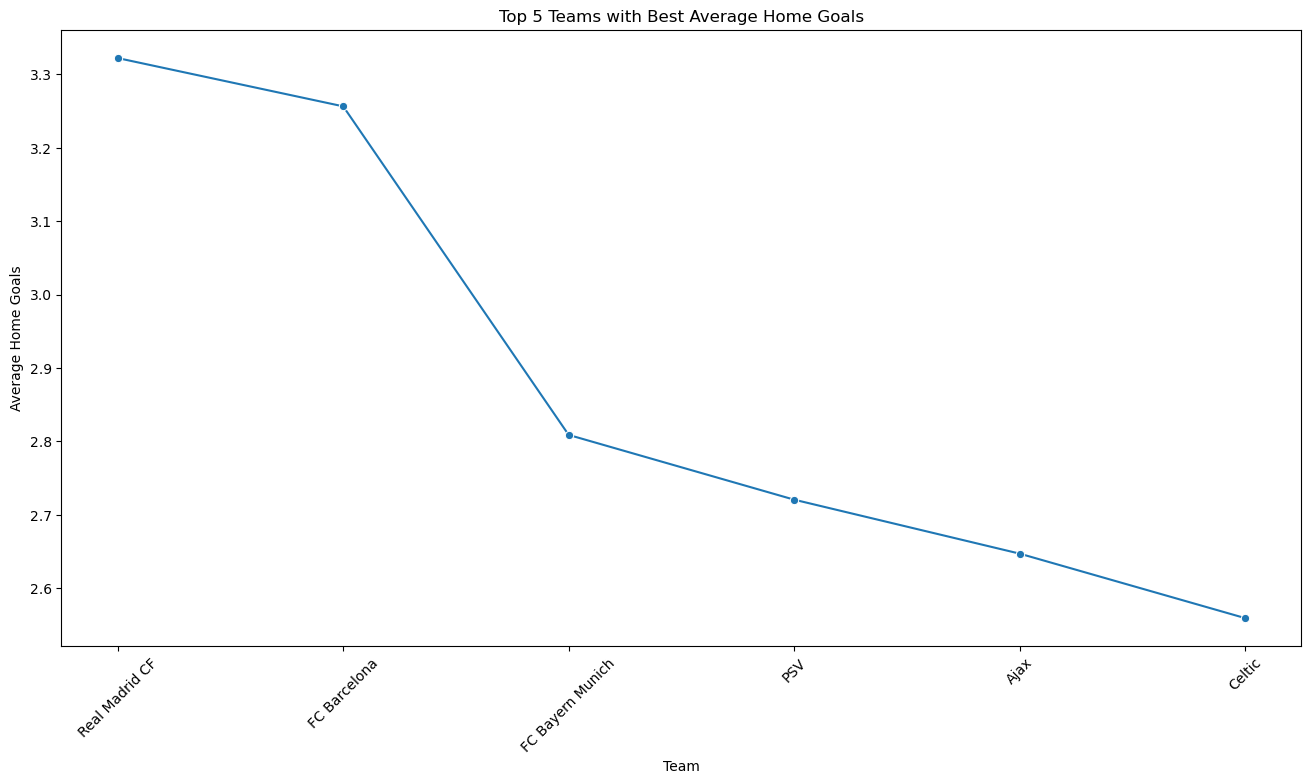

C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\685580703.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="team_long_name", y="avg_away_goals", data=top_teams_performance, marker="x", linestyle='--', palette='tab10')


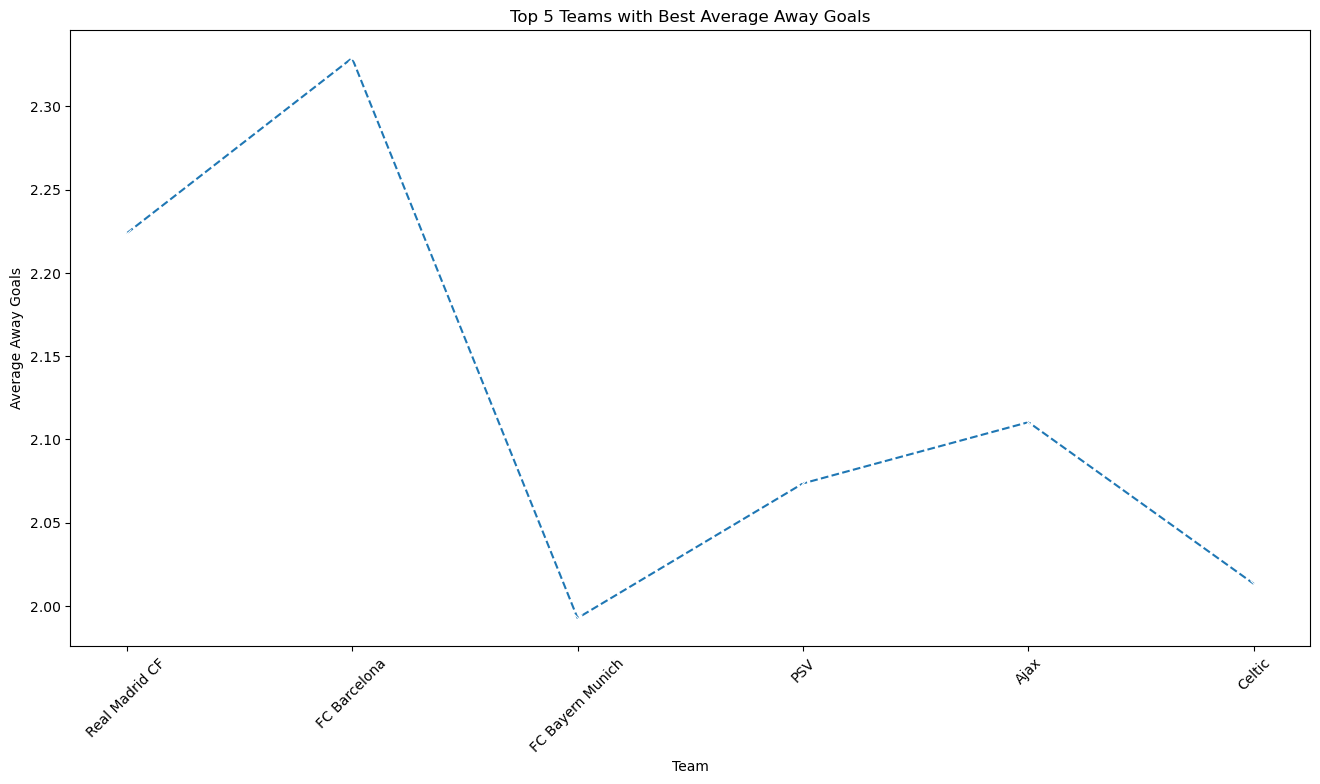

In [141]:
query = """
WITH TeamGoals AS (
    SELECT 
        T.team_long_name, 
        AVG(CASE WHEN M.home_team_api_id = T.team_api_id THEN M.home_team_goal ELSE NULL END) AS avg_home_goals,
        AVG(CASE WHEN M.away_team_api_id = T.team_api_id THEN M.away_team_goal ELSE NULL END) AS avg_away_goals
    FROM 
        Match M
    JOIN 
        Team T ON M.home_team_api_id = T.team_api_id OR M.away_team_api_id = T.team_api_id
    GROUP BY 
        T.team_long_name
),
Top5Teams AS (
    SELECT 
        team_long_name,
        avg_home_goals,
        avg_away_goals,
        RANK() OVER (ORDER BY avg_home_goals DESC) AS home_rank,
        RANK() OVER (ORDER BY avg_away_goals DESC) AS away_rank
    FROM 
        TeamGoals
)
SELECT 
    team_long_name,
    avg_home_goals,
    avg_away_goals
FROM 
    Top5Teams
WHERE 
    home_rank <= 5 OR away_rank <= 5
ORDER BY 
    home_rank, away_rank;
"""

top_teams_performance = pd.read_sql_query(query, conn)

# Plotting average home team goals over seasons
plt.figure(figsize=(16, 8))
sns.lineplot(x="team_long_name", y="avg_home_goals", data=top_teams_performance, marker="o", linestyle='-', palette='tab10')
plt.title('Top 5 Teams with Best Average Home Goals')
plt.xlabel('Team')
plt.ylabel('Average Home Goals')
plt.xticks(rotation=45)
plt.show()

# Plotting average away team goals over seasons
plt.figure(figsize=(16, 8))
sns.lineplot(x="team_long_name", y="avg_away_goals", data=top_teams_performance, marker="x", linestyle='--', palette='tab10')
plt.title('Top 5 Teams with Best Average Away Goals')
plt.xlabel('Team')
plt.ylabel('Average Away Goals')
plt.xticks(rotation=45)
plt.show()

#### Average Home Goals and Away Goals for all League

In [145]:
Leagueavg = pd.read_sql('''SELECT 
    L.name AS league_name, 

    AVG(M.home_team_goal) AS avg_home_goals, 
    AVG(M.away_team_goal) AS avg_away_goals
FROM 
    Match M
JOIN 
    League L ON M.league_id = L.id
GROUP BY 
    L.name
ORDER BY 
    L.name
''',conn)

Leagueavg 

,league_name,avg_home_goals,avg_away_goals
0,Belgium Jupiler League,1.609375,1.192130
1,England Premier League,1.550987,1.159539
2,France Ligue 1,1.402961,1.040132
3,Germany 1. Bundesliga,1.626634,1.274918
4,Italy Serie A,1.500829,1.116009
5,Netherlands Eredivisie,1.779820,1.301062
6,Poland Ekstraklasa,1.394792,1.030208
7,Portugal Liga ZON Sagres,1.408382,1.126218
8,Scotland Premier League,1.429276,1.204496
9,Spain LIGA BBVA,1.631250,1.135855


#### Leagues by Season

In [160]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


#### Average Goals per Game Over Time

C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3861985572.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3861985572.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3861985572.py:5: DeprecationWarning: In a future versi

<Axes: title={'center': 'Average Goals per Game Over Time'}>

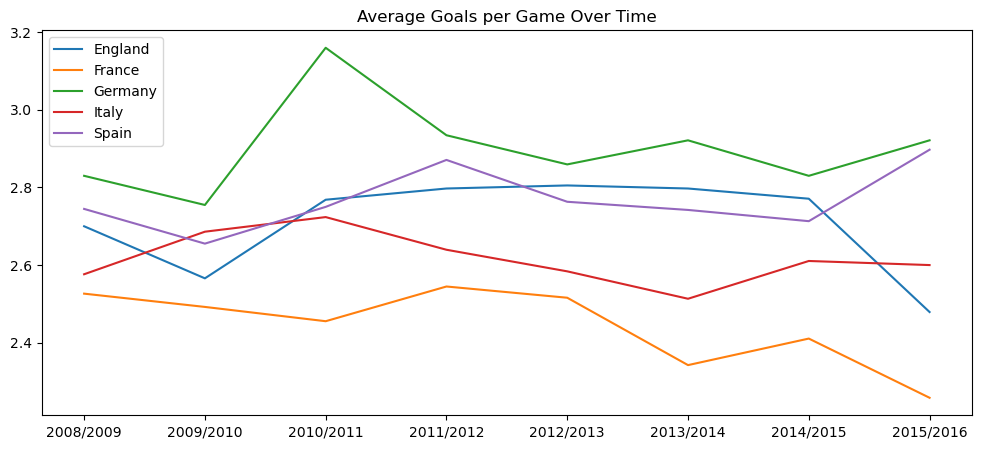

In [161]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

#### Average Goals Difference Home vs Out

C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3346553236.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3346553236.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
C:\Users\pphirke\AppData\Local\Temp\ipykernel_67328\3346553236.py:5: DeprecationWarning: In a future

<Axes: title={'center': 'Average Goals Difference Home vs Out'}>

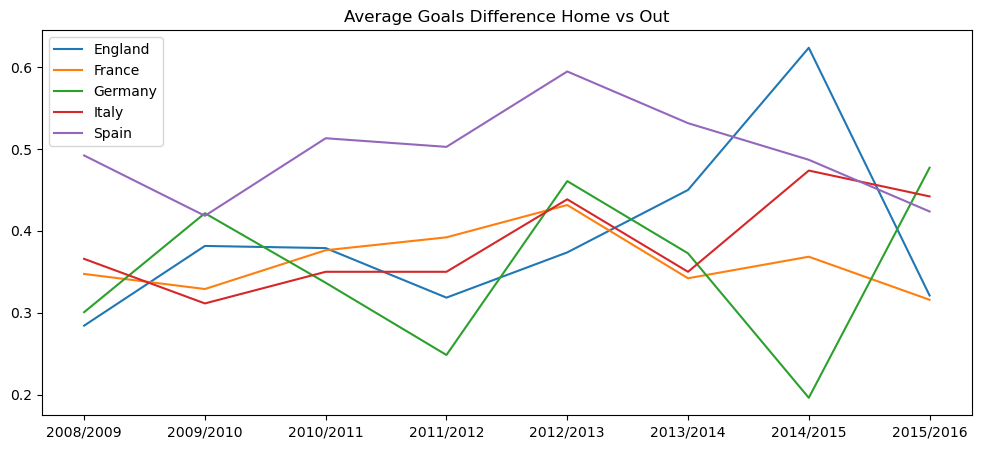

In [162]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

#### Most Successfull Teams compared for all seasons (Top 10 records)

In [176]:
sql = pd.read_sql(""" 
WITH TotalGames AS (
    SELECT
        Season,
        team_long_name AS Team,
        COUNT(match_api_id) AS TotalGames
    FROM match
    JOIN team ON match.home_team_api_id = team.team_api_id OR match.away_team_api_id = team.team_api_id
    GROUP BY Season, Team
),
Wins AS (
    SELECT
        Season,
        team_long_name AS Team,
        COUNT(match_api_id) AS Wins
    FROM match
    JOIN team ON match.home_team_api_id = team.team_api_id OR match.away_team_api_id = team.team_api_id
    WHERE (home_team_api_id = team_api_id AND home_team_goal > away_team_goal) OR (away_team_api_id = team_api_id AND away_team_goal > home_team_goal)
    GROUP BY Season, Team
)
SELECT
    tg.Season,
    tg.Team,
    SUM(tg.TotalGames) AS TotalGames,
    COALESCE(SUM(w.Wins), 0) AS Wins,
    ROUND(COALESCE(SUM(w.Wins), 0) * 100.0 / SUM(tg.TotalGames), 4) AS WinPercentage
FROM TotalGames AS tg
LEFT JOIN Wins AS w ON tg.Season = w.Season AND tg.Team = w.Team
GROUP BY tg.Season, tg.Team
ORDER BY WinPercentage DESC;

""", conn)
top_10_records = sql.head(10)
print(top_10_records)

      Season              Team  TotalGames  Wins  WinPercentage
0  2010/2011          FC Porto          30    27        90.0000
1  2013/2014          Juventus          38    33        86.8421
2  2012/2013  FC Bayern Munich          34    29        85.2941
3  2013/2014  FC Bayern Munich          34    29        85.2941
4  2014/2015               PSV          34    29        85.2941
5  2015/2016        SL Benfica          34    29        85.2941
6  2011/2012    Real Madrid CF          38    32        84.2105
7  2012/2013      FC Barcelona          38    32        84.2105
8  2015/2016  FC Bayern Munich          34    28        82.3529
9  2009/2010      FC Barcelona          38    31        81.5789
